# Assignment

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

Description of Variables

The dataset contains 6366 observations of 9 variables:
     
   rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
   very good)

   age: woman's age

   yrs_married: number of years married

  children: number of children

  religious: woman's rating of how religious she is (1 = not religious, 4     =strongly religious)

   educ: level of education (9 = grade school, 12 = high school, 14 =
  some college, 16 = college graduate, 17 = some graduate school, 20
  = advanced degree)


occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =     teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs


In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [34]:
df =sm.datasets.fair.load_pandas().data


In [35]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [36]:
def has_affair(x):
    if x==0:
        return 0
    else:
        return 1
df['affairs']= df['affairs'].apply(has_affair)
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [37]:
df.affairs.value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [38]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [39]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

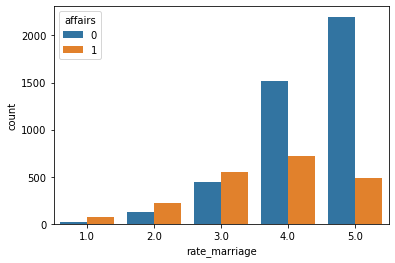

In [40]:
sns.countplot(x='rate_marriage', hue='affairs',data=df)

# Marriage with higher ratings have less affair chances

In [41]:
df['age_married']= df['age']- df['yrs_married']
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,age_married
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1,23.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1,14.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1,19.5
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1,20.5
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0,19.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0,19.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0,19.5
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0,26.0


In [42]:
df['mar_child']= df['yrs_married']- df['children']
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,age_married,mar_child
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1,23.0,6.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1,14.0,10.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1,19.5,2.5
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1,20.5,12.5
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1,18.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0,19.0,11.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0,19.0,12.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0,19.5,2.5
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0,26.0,5.0


In [43]:
df[df['yrs_married']< df['children']]['affairs'].value_counts()

0    17
1     3
Name: affairs, dtype: int64

In [44]:
df[df['yrs_married']< df['children']]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,age_married,mar_child
603,3.0,27.0,2.5,4.0,2.0,14.0,3.0,2.0,1,24.5,-1.5
915,4.0,22.0,2.5,4.0,3.0,12.0,2.0,4.0,1,19.5,-1.5
931,4.0,22.0,2.5,5.5,3.0,12.0,3.0,2.0,1,19.5,-3.0
2430,4.0,27.0,0.5,1.0,3.0,17.0,4.0,4.0,0,26.5,-0.5
2493,5.0,22.0,0.5,2.0,1.0,12.0,2.0,4.0,0,21.5,-1.5
2759,4.0,27.0,2.5,3.0,2.0,12.0,3.0,6.0,0,24.5,-0.5
2934,5.0,22.0,2.5,3.0,3.0,12.0,3.0,4.0,0,19.5,-0.5
3038,5.0,22.0,0.5,1.0,2.0,12.0,2.0,2.0,0,21.5,-0.5
3334,5.0,22.0,0.5,1.0,3.0,16.0,4.0,5.0,0,21.5,-0.5
3509,5.0,22.0,0.5,2.0,2.0,16.0,4.0,4.0,0,21.5,-1.5


In [45]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')


rate_marriage: [3. 4. 5. 2. 1.]
age: [32.  27.  22.  37.  42.  17.5]
yrs_married: [ 9.  13.   2.5 16.5 23.   6.   0.5]
children: [3.  0.  4.  1.  5.5 2. ]
religious: [3. 1. 2. 4.]
educ: [17. 14. 16. 12. 20.  9.]
occupation: [2. 3. 5. 4. 1. 6.]
occupation_husb: [5. 4. 3. 2. 6. 1.]
affairs: [1 0]
age_married: [23.  14.  19.5 20.5 18.  21.  16.  28.  19.  31.  24.5 24.  15.5 25.5
 17.  29.  10.5 21.5 26.  29.5 39.5 15.  33.   9.  13.  26.5 34.5 31.5
 36.  36.5]
mar_child: [ 6.  10.   2.5 12.5  8.   9.  17.5  4.  11.   5.   7.  21.  12.  14.5
 13.5  0.5  1.5 19.  20.  13.   7.5 15.5  3.  22.  -1.5 -3.   3.5 -0.5
  2.  -3.5]


In [46]:
for col in df.columns:
    print(f'{col}: {df[col].value_counts()}')

rate_marriage: 5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64
age: 27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64
yrs_married: 2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64
children: 0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64
religious: 3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64
educ: 14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64
occupation: 3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64
occupation_husb: 4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64
affairs: 0    4313
1    2053
Name: affairs, dtype: int64
age_married: 19.5    1312
19.0    1032
21.

In [47]:
def children_clean(x):
    if x==5.5:
        return 5
    else:
        return x
df['children']= df['children'].apply(children_clean)


In [48]:
df[df['age_married']<17]['affairs'].value_counts()

0    501
1    427
Name: affairs, dtype: int64

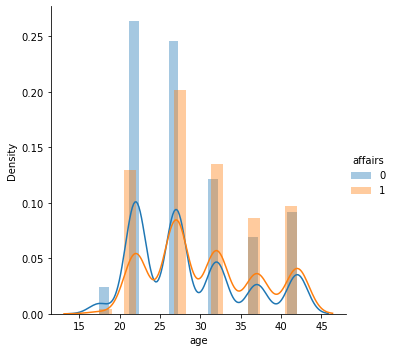

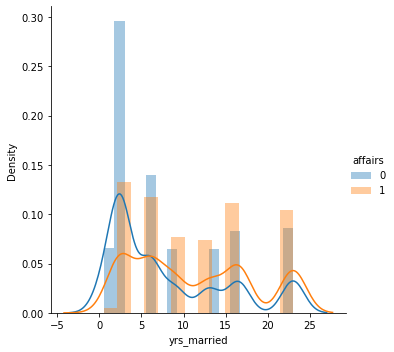

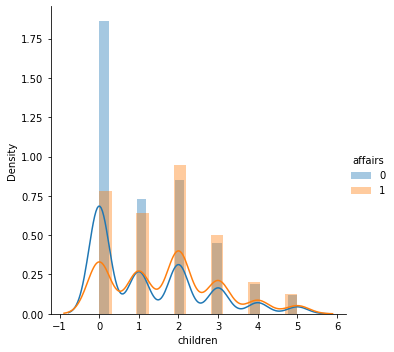

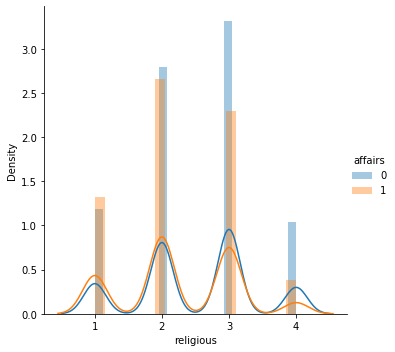

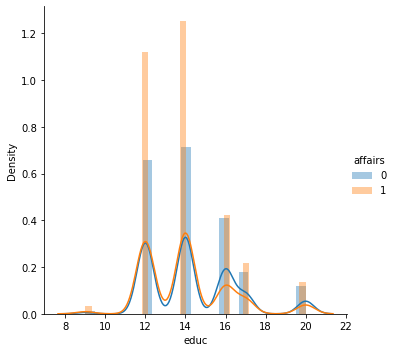

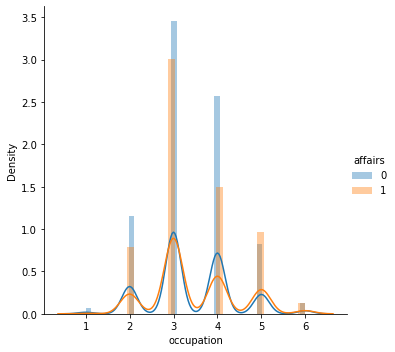

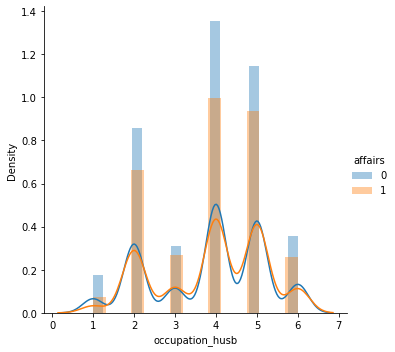

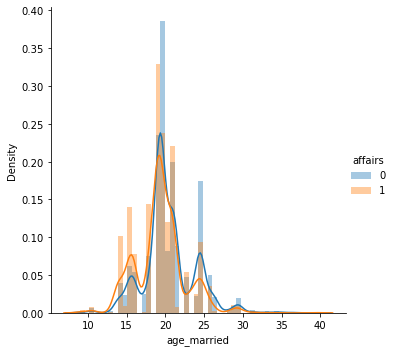

In [49]:
for col in ['age', 'yrs_married', 'children', 'religious', 'educ', 'occupation',
       'occupation_husb', 'age_married']:
    sns.FacetGrid(df, height=5, hue='affairs').map(sns.distplot, col).add_legend()
    plt.show()

# People who are married for more than 6 years are more bound to have affair.
# People who married at younger age have more chances of having affair.
# People who are more religious have less chances of having an affair.

In [51]:
X=df.drop(columns=['affairs'])
y=df['affairs']



In [52]:
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y, random_state=42)


In [53]:
from sklearn.model_selection import GridSearchCV
params= {'C': [100,1,2,200],'penalty' : ['l1','l2']}
model= GridSearchCV(LogisticRegression(class_weight=[2,1]), param_grid=params, scoring='roc_auc',cv=5,refit=True)
model.fit(X_train,y_train)
print(model.best_estimator_)
print(model.score(X_train,y_train))

LogisticRegression(C=1, class_weight=[2, 1], dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7459647239946127


In [54]:
clf=model.best_estimator_
clf.fit(X_train, y_train)
y_pred_train=clf.predict_proba(X_train)[:,1]
y_pred=clf.predict_proba(X_test)[:,1]
print(f'Logistic model test auc: {round(metrics.roc_auc_score(y_test,y_pred),2)}')
print(f'Logistic model train auc: {round(metrics.roc_auc_score(y_train,y_pred_train), 2)}\n\n')

import xgboost as xgb
clf2= xgb.XGBClassifier(max_depth=1,n_estimators=50)
clf2.fit(X_train,y_train)
y_pred2_train=clf2.predict_proba(X_train)[:,1]
y_pred2=clf2.predict_proba(X_test)[:,1]
print(f'XGBOOST TEST AUC: {round(metrics.roc_auc_score(y_test,y_pred2),2)}')
print(f'XGBOOST TRAIN AUC: {round(metrics.roc_auc_score(y_train, y_pred2_train), 2)}')


Logistic model test auc: 0.74
Logistic model train auc: 0.75


XGBOOST TEST AUC: 0.74
XGBOOST TRAIN AUC: 0.75


In [55]:
pred=[1 if i > 0.5 else 0 for i in y_pred]
y_pred

array([0.09028081, 0.18491913, 0.11526093, ..., 0.45688704, 0.19442371,
       0.09639939])

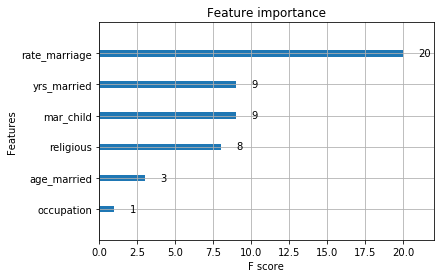

In [57]:
xgb.plot_importance(clf2)

In [58]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(clf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [59]:
def predict(df):
    df['age_married']= df['age']- df['yrs_married']
    df['mar_child']= df['yrs_married']- df['children']
    loaded_model = pickle.load(open(filename, 'rb'))
    prediction=loaded_model.predict(df)
    return prediction
    

In [62]:
data= pd.DataFrame(columns=X_test.columns,data=X_test[:1].values)
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,age_married,mar_child
0,5.0,27.0,2.5,1.0,3.0,16.0,4.0,4.0,24.5,1.5


In [65]:
vals={
            'rate_marriage': [5.],
            'age': [27.0], 
            'yrs_married': [2.5], 
            'children': [1.0], 
            'religious': [3.0],
            'educ': [16.0],
            'occupation': [4.0],
            'occupation_husb':[4.0]
        }
df2= pd.DataFrame(vals)
predict(df2)

array([0], dtype=int64)